In [27]:
import pandas as pd
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig
from pytorch_tabular.models.tab_transformer.config import TabTransformerConfig
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [28]:
df = pd.read_csv("Data/daily_timeseries_parking_violations_v1.csv")

In [29]:
df.head()

,date,num_violations,year,month,is_holiday,is_weekend,day_of_week,DDOT,DPW,MPD-1D,MPD-3D,OTHER,USCP
0,2023-01-01,239,2023,1,True,True,Sunday,0,189,1,8,37,4
1,2023-01-02,232,2023,1,True,False,Monday,0,171,6,2,53,0
2,2023-01-03,3401,2023,1,False,False,Tuesday,0,3334,1,8,33,25
3,2023-01-04,4990,2023,1,False,False,Wednesday,0,4925,1,3,48,13
4,2023-01-05,5263,2023,1,False,False,Thursday,0,5141,2,10,92,18


In [30]:
df.sort_values("num_violations").head(10)

,date,num_violations,year,month,is_holiday,is_weekend,day_of_week,DDOT,DPW,MPD-1D,MPD-3D,OTHER,USCP
694,2024-12-25,8,2024,12,True,False,Wednesday,0,0,3,0,5,0
296,2023-11-23,29,2023,11,True,False,Thursday,0,5,7,1,16,0
846,2025-05-26,45,2025,5,True,False,Monday,0,15,4,5,21,0
667,2024-11-28,45,2024,11,True,False,Thursday,4,11,1,2,27,0
328,2023-12-25,46,2023,12,True,False,Monday,0,0,6,6,34,0
748,2025-02-17,67,2025,2,True,False,Monday,0,8,3,7,49,0
349,2024-01-15,79,2024,1,True,False,Monday,0,24,5,8,40,2
15,2023-01-16,81,2023,1,True,False,Monday,0,35,5,4,37,0
650,2024-11-11,84,2024,11,True,False,Monday,0,9,13,6,56,0
251,2023-10-09,85,2023,10,True,False,Monday,0,31,7,11,36,0


In [31]:
df['target'] = df['num_violations'].shift(-1)
df = df.dropna().reset_index(drop=True)

In [34]:
categorical_cols = ['is_holiday', 'is_weekend', 'day_of_week']
agency_cols = ['DDOT', 'DPW', 'MPD-1D', 'USCP', 'MPD-3D', 'OTHER']
continuous_cols = ['year', 'month', 'num_violations'] + agency_cols
target_col = 'target'

In [35]:
df[continuous_cols] = df[continuous_cols].astype("float")

In [36]:
data_config = DataConfig(
    target=[target_col],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

In [37]:
model_config = TabTransformerConfig(
    task="regression",
    metrics=["mean_absolute_error", "mean_squared_error"]
)

In [38]:
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=32,
    max_epochs=10,
    early_stopping=None,
    accelerator="cpu",
    checkpoints=None
)

In [39]:
optimizer_config = OptimizerConfig()

In [40]:
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    trainer_config=trainer_config,
    optimizer_config=optimizer_config
)

2025-07-22 21:44:19,060 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [41]:
tabular_model.fit(train=df)

Seed set to 42


2025-07-22 21:44:20,255 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-07-22 21:44:20,264 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will 

2025-07-22 21:44:20,293 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: TabTransformerModel

2025-07-22 21:44:20,345 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-07-22 21:44:20,379 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (22) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_lightning/tr

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.3981071705534969
Restoring states from the checkpoint path at /Users/Nidhi/Summer2025/MSML612/MSML612-Deep-Learning-Final-Project/.lr_find_dfb909c9-487d-43ba-bbf5-71a2ec345907.ckpt
Restored all states from the checkpoint at /Users/Nidhi/Summer2025/MSML612/MSML612-Deep-Learning-Final-Project/.lr_find_dfb909c9-487d-43ba-bbf5-71a2ec345907.ckpt


2025-07-22 21:44:22,510 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.3981071705534969. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-07-22 21:44:22,514 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  271 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │    472 │ train │
│ 2 │ _head            │ LinearHead             │    106 │ train │
│ 3 │ loss             │ MSELoss                │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 271 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 271 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 125                                                                                         
Modules in eval mode: 0

Output()

`Trainer.fit` stopped: `max_epochs=10` reached.


2025-07-22 21:44:28,751 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-07-22 21:44:28,752 - {pytorch_tabular.tabular_model:1539} - WARNING - No best model available to load.        
Checkpoint Callback needs to be enabled for this to work

In [17]:
results = tabular_model.evaluate(df)

Output()

/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will 

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │         2649354.5         │
│ test_mean_absolute_error  │      1356.6884765625      │
│  test_mean_squared_error  │         2649354.5         │
└───────────────────────────┴───────────────────────────┘

In [18]:
metrics = results[0]

print("MAE:", metrics["test_mean_absolute_error"])
print("RMSE:", (metrics["test_mean_squared_error"])**0.5)

MAE: 1356.6884765625
RMSE: 1627.6837837860276


In [19]:
df["num_violations"].describe()

count     485.000000
mean     3337.045361
std      1883.376762
min        29.000000
25%      1647.000000
50%      3901.000000
75%      4905.000000
max      6472.000000
Name: num_violations, dtype: float64

In [20]:
preds = tabular_model.predict(df)

/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/Nidhi/miniconda3/envs/612-final-project/lib/python3.11/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will 

In [42]:
preds.head()

,target_prediction
0,2452.228760
1,2364.537354
2,3938.849854
3,4633.542969
4,4906.907227


In [43]:
df_results = df.copy()
df_results["predicted"] = preds["target_prediction"]

September 2023 data missing

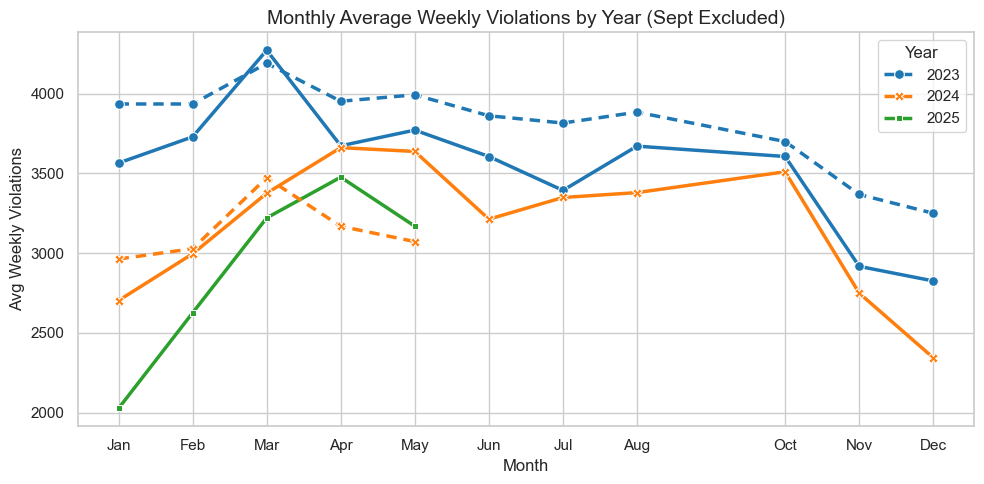

In [44]:
sns.set_theme(style="whitegrid")
df_results["date"] = pd.to_datetime(df_results["date"], errors="coerce")

df_results["month"] = df_results["date"].dt.month
df_results["year"] = df_results["date"].dt.year
df_monthly = df_results[df_results["month"] != 9]

monthly_avg = df_monthly.groupby(["year", "month"])[["num_violations", "predicted"]].mean().reset_index()

plt.figure(figsize=(10, 5))

custom_palette = {
    2023: "#1f77b4",
    2024: "#ff7f0e",
    2025: "#2ca02c"
}

sns.lineplot(
    data=monthly_avg,
    x="month", y="num_violations",
    hue="year", palette=custom_palette, style="year",
    linewidth=2.5, markers=True, dashes=False, markersize=7, legend=False
)

sns.lineplot(
    data=monthly_avg,
    x="month", y="predicted",
    hue="year", palette=custom_palette, style="year",
    linewidth=2.5, markers=True, dashes=[(3, 2)] * monthly_avg["year"].nunique(), markersize=7
)


plt.title("Monthly Average Weekly Violations by Year (Sept Excluded)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Avg Weekly Violations")

months_present = sorted(monthly_avg["month"].unique())
month_labels = [calendar.month_abbr[m] for m in months_present]
plt.xticks(ticks=months_present, labels=month_labels)

plt.legend(title="Year")
plt.grid(True)
plt.tight_layout()
plt.show()